In [1]:
!python --version

Python 3.9.6


In [2]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import time

Helper function from 331

In [4]:
# do_comparison is an optional helper function but HIGHLY recommended!!!
def do_comparison(first, second, comparator, descending):
    """
    Takes elements first and second, the comparator, and descending as arguments,
    and tells you whether or not to put a before b in the sorted list
    """
    if not descending and comparator(first, second):
        return True
    elif descending and comparator(second, first):
        return True
    else:
        return False
    

Insertion sort from CSE 331

In [5]:
def insertion_sort(data, *, comparator = lambda x, y: x < y,
                   descending = False):
    """
    Given a list of values, sort that list in-place using the insertion sort algorithm and the provided comparator,
        data: List of values that needs to be sorted
        comparator: lambda function that will do evaluation between two elements
        descending: descending if True, otherwise ascending
    returns
        None
    """
    for i in range(1, len(data)):
        j = i
        while j > 0 and do_comparison(data[j], data[j - 1], comparator, descending):
            data[j], data[j - 1] = data[j - 1], data[j]
            j -= 1

Merge sort from cse 331

In [6]:
def merge(s1, s2, s, comparator = lambda x, y: x < y, descending = False):
        """
        Merge two sorted Python Lists S1 and S2 into properly sized list
        """
        i, j = 0, 0
        while i + j < len(s):
            if j == len(s2) or (i < len(s1) and do_comparison(s1[i], s2[j], comparator, descending)):
                s[i + j] = s1[i]
                i = i + 1
            else:
                s[i + j] = s2[j]
                j = j + 1

def merge_sort(s):
    """
    Sort the elements of Python list S using
    the merge sort algorithm
    """
    n = len(s)
    if n < 2:
        return
    mid = n // 2
    S1 = s[0:mid]
    S2 = s[mid:n]
    merge_sort(S1)
    merge_sort(S2)
    merge(S1, S2, s)

Hybrid merge sort from 331

In [7]:
def hybrid_merge_sort(data, *, threshold = 12,
                      comparator = lambda x, y: x < y, descending = False):
    """
    Given a list of values, sort that list using a hybrid sort with the merge sort and insertion sort
    parameters
        data: List of values that needs to be sorted
        threshold: threshold between insertion sort vs merge sort
        comparator: lambda function that will do evaluation between two elements
        descending: descending if True, otherwise ascending
    returns
        None
    """
    
    if len(data) <= threshold:
        insertion_sort(data, comparator=comparator)
    else:
        merge_sort(data)


Define k values to test with

In [16]:
k_values = [i for i in range(0,151)]
k_values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150]

Find optimal k for specific n's

In [17]:
times = []
for k in k_values:
    k_times = []
    for _ in range(1000):
        arr = np.random.randint(0, 10000, size=150)
        start_time = time.time()
        hybrid_merge_sort(arr, threshold=k)
        hybrid_sort_time = time.time() - start_time
        k_times.append(hybrid_sort_time)
        
    times.append(np.mean(k_times))
    print('finished', k)

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9
finished 10
finished 11
finished 12
finished 13
finished 14
finished 15
finished 16
finished 17
finished 18
finished 19
finished 20
finished 21
finished 22
finished 23
finished 24
finished 25
finished 26
finished 27
finished 28
finished 29
finished 30
finished 31
finished 32
finished 33
finished 34
finished 35
finished 36
finished 37
finished 38
finished 39
finished 40
finished 41
finished 42
finished 43
finished 44
finished 45
finished 46
finished 47
finished 48
finished 49
finished 50
finished 51
finished 52
finished 53
finished 54
finished 55
finished 56
finished 57
finished 58
finished 59
finished 60
finished 61
finished 62
finished 63
finished 64
finished 65
finished 66
finished 67
finished 68
finished 69
finished 70
finished 71
finished 72
finished 73
finished 74
finished 75
finished 76
finished 77
finished 78
finished 79
finished 80
finished 81
finished 82
finished 83
fi

In [18]:
optimal_k = np.argmin(times)
optimal_k

np.int64(89)

/var/folders/v5/b5z3y12x6kbgmyv1yqp6ktfc0000gn/T/ipykernel_75236/351240182.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


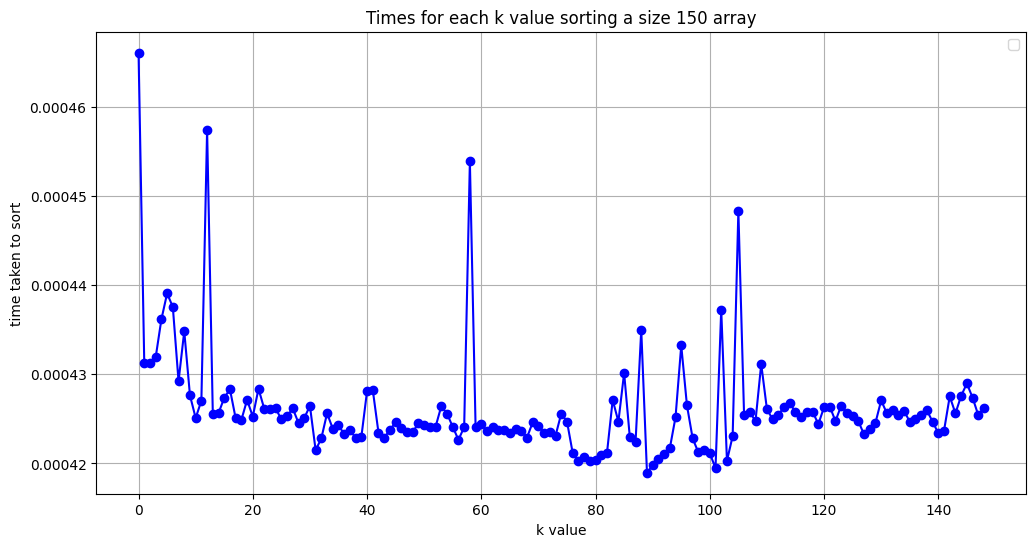

In [43]:
plt.figure(figsize=(12, 6))
plt.title('Times for each k value sorting a size 150 array')
plt.xlabel('k value')
plt.ylabel('time taken to sort')
plt.plot(k_values[:149], times[:149], 'b-o')
plt.legend()
plt.grid(True)

plt.show()

# Compare Merge, Insertion, Hybrid

In [38]:
merge_times = []
insertion_times = []
hybrid_sort_times = []
iterations = 1000
for n in range(1, 251, 5):
    merge_time = insertion_time = hybrid_sort_time = 0
    for _ in range(iterations):
        lst = np.random.randint(0, 10000, size=n)
        
        # merge sort
        if True: # remove from scope so doesn't affect times of other
            merge_array = deepcopy(lst) # deepcopy to not mess up original list
            start_time = time.time()
            merge_sort(merge_array)
            merge_time += time.time() - start_time
            
        # insertion sort
        if True:
            insertion_array = deepcopy(lst)
            start_time = time.time()
            insertion_sort(insertion_array)
            insertion_time += time.time() - start_time
            
        # hybrid sort
        if True:
            hybrid_array = deepcopy(lst)
            start_time = time.time()
            hybrid_merge_sort(hybrid_array, threshold=optimal_k)
            hybrid_sort_time += time.time() - start_time
    
    merge_times.append(merge_time / iterations)
    insertion_times.append(insertion_time / iterations)
    hybrid_sort_times.append(hybrid_sort_time / iterations)
    print('finished', n)

finished 1
finished 6
finished 11
finished 16
finished 21
finished 26
finished 31
finished 36
finished 41
finished 46
finished 51
finished 56
finished 61
finished 66
finished 71
finished 76
finished 81
finished 86
finished 91
finished 96
finished 101
finished 106
finished 111
finished 116
finished 121
finished 126
finished 131
finished 136
finished 141
finished 146
finished 151
finished 156
finished 161
finished 166
finished 171
finished 176
finished 181
finished 186
finished 191
finished 196
finished 201
finished 206
finished 211
finished 216
finished 221
finished 226
finished 231
finished 236
finished 241
finished 246


In [39]:
# Averages
print('Averages')
print(f'Merge Sort: {np.mean(merge_times):.3}')
print(f'Insertion Sort: {np.mean(insertion_times):.3}')
print(f'Hybrid Sort: {np.mean(hybrid_sort_times):.3}')
print()
# Max
print('Max')
print(f'Merge Sort: {np.max(merge_times):.3}')
print(f'Insertion Sort: {np.max(insertion_times):.3}')
print(f'Hybrid Sort: {np.max(hybrid_sort_times):.3}')
print()
# Sum
print('Sum')
print(f'Merge Sort: {np.sum(merge_times):.3}')
print(f'Insertion Sort: {np.sum(insertion_times):.3}')
print(f'Hybrid Sort: {np.sum(hybrid_sort_times):.3}')
print()

Averages
Merge Sort: 0.000355
Insertion Sort: 0.00219
Hybrid Sort: 0.000418

Max
Merge Sort: 0.000762
Insertion Sort: 0.0065
Hybrid Sort: 0.000771

Sum
Merge Sort: 0.0178
Insertion Sort: 0.11
Hybrid Sort: 0.0209



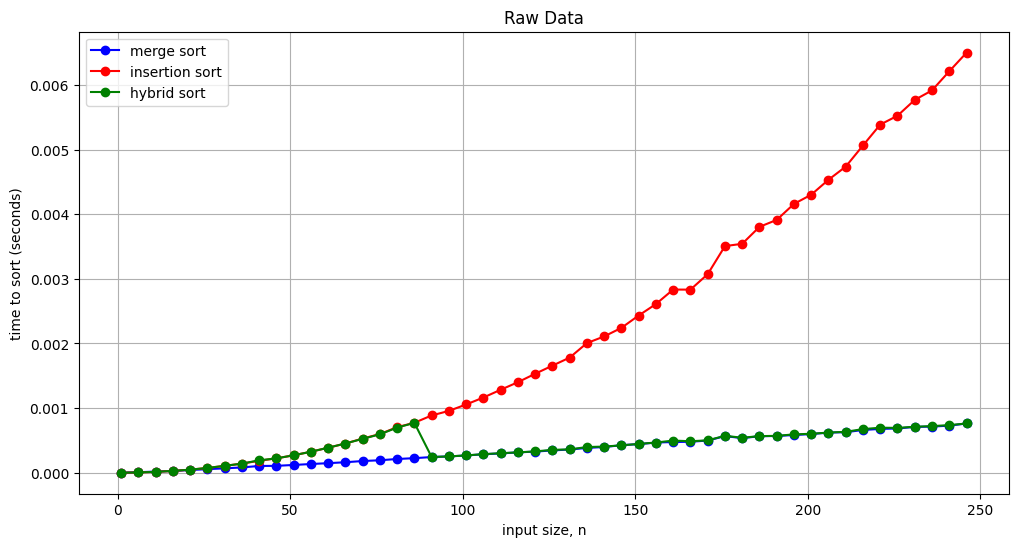

In [40]:
tmp_n_values = [i for i in range(1, 251, 5)]
plt.figure(figsize=(12, 6))
plt.title('Raw Data')
plt.xlabel('input size, n')
plt.ylabel('time to sort (seconds)')
plt.plot(tmp_n_values, merge_times, 'b-o', label='merge sort')
plt.plot(tmp_n_values, insertion_times, 'r-o', label='insertion sort')
plt.plot(tmp_n_values, hybrid_sort_times, 'g-o', label='hybrid sort')
plt.legend()
plt.grid(True)

plt.show()